In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
STOPWORDS = set(stopwords.words('english'))

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
resumeDataSet = pd.read_csv('/content/drive/MyDrive/Thesis_Niiaz/dataset_lm.csv' ,encoding='utf-8')
resumeDataSet.head()

,Unnamed: 0,Unnamed: 0.1,position,cv,cleaned_resume
0,0,0,7,\naustin tx\nemail me on indeed httpwwwindeedc...,doctor chiropract intern licens decemb look as...
1,1,1,7,\nwaupun wi\nemail me on indeed httpwwwindeedc...,waupun will reloc anywher work experi scienc t...
2,2,2,7,\nrichardson tx\nemail me on indeed httpwwwind...,richardson teach math middl school math algebr...
3,3,3,7,\nnew port richey fl\nemail me on indeed httpw...,new port richey will reloc anywher work experi...
4,4,4,7,\nbuhl al\nemail me on indeed httpwwwindeedcom...,buhl author work u employ work experi scienc t...


In [6]:
pd.read_csv('/content/drive/MyDrive/Thesis_Niiaz/results1.csv' ,encoding='utf-8')

,Unnamed: 0,epoch,max_length,batch_size,lr_rate,eps,train_loss,val_loss,val_f1
0,0,1.0,450.0,3.0,0.00002,1.000000e-08,0.705329,0.560419,0.897373
1,1,2.0,450.0,3.0,0.00002,1.000000e-08,0.330894,0.450504,0.919673
2,2,3.0,450.0,3.0,0.00002,1.000000e-08,0.245305,0.480421,0.913615
3,3,4.0,450.0,3.0,0.00002,1.000000e-08,0.154768,0.517349,0.918518
4,4,5.0,450.0,3.0,0.00002,1.000000e-08,0.105203,0.533419,0.916102


In [7]:
resumeDataSet2 = pd.read_csv('/content/drive/MyDrive/Thesis_Niiaz/teachers_dataset.csv' ,encoding='utf-8')
resumeDataSet2.head()

,position,cv
0,science_teacher,\naustin tx\nemail me on indeed httpwwwindeedc...
1,science_teacher,\nwaupun wi\nemail me on indeed httpwwwindeedc...
2,science_teacher,\nrichardson tx\nemail me on indeed httpwwwind...
3,science_teacher,\nnew port richey fl\nemail me on indeed httpw...
4,science_teacher,\nbuhl al\nemail me on indeed httpwwwindeedcom...


In [8]:
resumeDataSet['y'] = resumeDataSet2['position']

In [9]:
label_dict = {'primary_teacher' : 6,
              'kg_teacher' : 3,
              'esl_teacher' : 1,
              'ict_teacher' : 2,
              'science_teacher' : 7,
              'music_teacher' : 5,
              'math_teacher' : 4,
              'art_teacher' : 0
              }

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [11]:

train, test = train_test_split(resumeDataSet, test_size=0.2,random_state=42, stratify=resumeDataSet['position'])

train_df, valid_df = train_test_split(train, test_size=0.2, random_state=42)
X_train, y_train = train_df["cleaned_resume"], train_df["position"]
X_valid, y_valid = valid_df["cleaned_resume"], valid_df["position"]

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk import word_tokenize
from sklearn.pipeline import make_pipeline
nltk.download('punkt')

from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and   
    #characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [14]:
lst_stopwords = nltk.corpus.stopwords.words("english")
#lst_stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [15]:
import re
resumeDataSet["text_clean"] = resumeDataSet["cv"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
resumeDataSet.head()

,Unnamed: 0,Unnamed: 0.1,position,cv,cleaned_resume,y,text_clean
0,0,0,7,\naustin tx\nemail me on indeed httpwwwindeedc...,doctor chiropract intern licens decemb look as...,science_teacher,austin tx email indeed httpwwwindeedcomrsaraht...
1,1,1,7,\nwaupun wi\nemail me on indeed httpwwwindeedc...,waupun will reloc anywher work experi scienc t...,science_teacher,waupun wi email indeed httpwwwindeedcomradrian...
2,2,2,7,\nrichardson tx\nemail me on indeed httpwwwind...,richardson teach math middl school math algebr...,science_teacher,richardson tx email indeed httpwwwindeedcomrla...
3,3,3,7,\nnew port richey fl\nemail me on indeed httpw...,new port richey will reloc anywher work experi...,science_teacher,new port richey fl email indeed httpwwwindeedc...
4,4,4,7,\nbuhl al\nemail me on indeed httpwwwindeedcom...,buhl author work u employ work experi scienc t...,science_teacher,buhl al email indeed httpwwwindeedcomrdianayes...


In [16]:
resumeDataSet_ = resumeDataSet.drop(['position',	'cv', 'cleaned_resume'], axis=1)
resumeDataSet_ = resumeDataSet_[['y', 'text_clean']]

In [17]:
resumeDataSet_[['y', 'text_clean']].to_csv('/content/drive/MyDrive/text_clean.csv' ,encoding='utf-8')

In [18]:
resumeDataSet

,Unnamed: 0,Unnamed: 0.1,position,cv,cleaned_resume,y,text_clean
0,0,0,7,\naustin tx\nemail me on indeed httpwwwindeedc...,doctor chiropract intern licens decemb look as...,science_teacher,austin tx email indeed httpwwwindeedcomrsaraht...
1,1,1,7,\nwaupun wi\nemail me on indeed httpwwwindeedc...,waupun will reloc anywher work experi scienc t...,science_teacher,waupun wi email indeed httpwwwindeedcomradrian...
2,2,2,7,\nrichardson tx\nemail me on indeed httpwwwind...,richardson teach math middl school math algebr...,science_teacher,richardson tx email indeed httpwwwindeedcomrla...
3,3,3,7,\nnew port richey fl\nemail me on indeed httpw...,new port richey will reloc anywher work experi...,science_teacher,new port richey fl email indeed httpwwwindeedc...
4,4,4,7,\nbuhl al\nemail me on indeed httpwwwindeedcom...,buhl author work u employ work experi scienc t...,science_teacher,buhl al email indeed httpwwwindeedcomrdianayes...
...,...,...,...,...,...,...,...
4114,4114,4114,6,\nclaremont nh\nemail me on indeed httpwwwinde...,claremont work experi lead primari teacher new...,primary_teacher,claremont nh email indeed httpwwwindeedcomrjes...
4115,4115,4115,6,\ndavis ca\nemail me on indeed httpwwwindeedco...,davi resili educ turn salesforc certifi admini...,primary_teacher,davis ca email indeed httpwwwindeedcomrlorigon...
4116,4116,4116,6,\natlanta ga\nemail me on indeed httpwwwindeed...,atlanta teacher certif elementari educ k teach...,primary_teacher,atlanta ga email indeed httpwwwindeedcomrpamel...
4117,4117,4117,6,\ndarlington pa\nemail me on indeed httpwwwind...,darlington author work u employ work experi te...,primary_teacher,darlington pa email indeed httpwwwindeedcomrji...


In [19]:
## split dataset
dtf_train, dtf_test = train_test_split(resumeDataSet, test_size=0.2, stratify = resumeDataSet.y)
## get target
y_train = dtf_train["y"].values
y_test = dtf_test["y"].values

In [20]:
vectorizer = CountVectorizer(#max_features=100000, 
                             ngram_range=(1,3))

#vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [21]:
#import seaborn as sns
#sns.heatmap(X_train.todense()[:,np.random.randint(0,X_train.shape[1],100)]==0, vmin=0, vmax=1, 
#            cbar=False).set_title('Sparse Matrix Sample')

In [22]:
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

from sklearn.feature_selection import chi2

In [23]:
#!pip install transformers

In [24]:
#!pip install tensorflow

In [26]:
## for explainer
from lime import lime_text
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import transformers

In [27]:
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [28]:
X_train.shape

(2636,)

In [26]:
# preprocessor to remove digits in string
from nltk import word_tokenize
def remove_numeric_string(text):
    return re.sub(r'\d+', '', text)

vectorizer = CountVectorizer(dtype=np.float32,
                                 preprocessor=remove_numeric_string, # remove numeric term
                                 strip_accents='unicode',
                                 tokenizer=word_tokenize,
                                 ngram_range=(1,3), # keep the unigram
                                 analyzer='word', # feature should be made of word n-gram
                                 min_df=10, # ignore terms appeared less than 10 times
                                 max_df=0.8) # ignore terms appeared more than 75% of the tweets available

In [27]:
## split dataset
dtf_train, dtf_test = train_test_split(resumeDataSet, test_size=0.2, stratify = resumeDataSet.position)
## get target
y_train = dtf_train["position"].values
y_test = dtf_test["position"].values
import re
corpus = dtf_train["cleaned_resume"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [28]:
X_train.shape, y_train.shape

((3295, 19608), (3295,))

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk import word_tokenize
from sklearn.pipeline import make_pipeline
nltk.download('punkt')

from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
classifier = XGBClassifier()

## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
## train classifier
model["classifier"].fit(X_train, y_train)
## test


XGBClassifier(objective='multi:softprob')

In [31]:
## split dataset
dtf_train, dtf_test = train_test_split(resumeDataSet, test_size=0.2, stratify = resumeDataSet.position)
## get target
y_train = dtf_train["y"]
y_test = dtf_test["y"]

corpus = dtf_train["text_clean"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_



In [32]:
model.fit(dtf_train["text_clean"].values, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(dtype=<class 'numpy.float32'>, max_df=0.8,
                                 min_df=10, ngram_range=(1, 3),
                                 preprocessor=<function remove_numeric_string at 0x7f5954f91dc0>,
                                 strip_accents='unicode',
                                 tokenizer=<function word_tokenize at 0x7f5955a4d700>)),
                ('classifier', XGBClassifier(objective='multi:softprob'))])

In [33]:
X_test = dtf_test["text_clean"].values
predicted = model.predict(X_test)

In [34]:
import seaborn as sns

#classes = np.unique(y_test)
classes = ['art', 'esl', 'ict', 'kg',
       'math', 'music', 'primary',
       'science']
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)


print(metrics.classification_report(y_test, predicted))
    


                 precision    recall  f1-score   support

    art_teacher       0.90      0.86      0.88       100
    esl_teacher       0.90      0.87      0.88       105
    ict_teacher       0.96      0.94      0.95       103
     kg_teacher       0.81      0.87      0.84       105
   math_teacher       0.98      0.97      0.98       101
  music_teacher       0.96      0.97      0.97       101
primary_teacher       0.86      0.89      0.87       106
science_teacher       0.91      0.91      0.91       103

       accuracy                           0.91       824
      macro avg       0.91      0.91      0.91       824
   weighted avg       0.91      0.91      0.91       824



In [36]:
!pip install eli5
import eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
eli5.show_weights(model, top=20)

Weight,Feature
0.0717,art teacher
0.0710,math teacher
0.0538,science teacher
0.0383,kindergarten teacher
0.0334,ict
0.0278,esl
0.0270,work experience kindergarten
0.0264,music
0.0250,primary
0.0216,experience science


In [40]:
eli5.show_weights(model, top=10, targets=['math_teacher'])

Weight,Feature
0.0717,art teacher
0.0710,math teacher
0.0538,science teacher
0.0383,kindergarten teacher
0.0334,ict
0.0278,esl
0.0270,work experience kindergarten
0.0264,music
0.0250,primary
0.0216,experience science


In [94]:
model['classifier'].feature_importances_.argsort()[-5:]

array([ 4834,  6373, 12239,  8438,   889])

In [85]:
model['classifier'].feature_importances_[sort]

array([0.        , 0.        , 0.        , ..., 0.0642677 , 0.08101996,
       0.09325805], dtype=float32)

In [100]:
for num in model['classifier'].feature_importances_.argsort()[-25:]:
  print(reversedDict[num])

charter school
music teacher
science biology
secondary
experience kindergarten
math
teacherict
storytelling
preprimary
language art
art
secondary mathematics
prekindergarten
kg
experience science
experience secondary
kindergarten
kindergarten teacher
primary
music
esl
ict
science teacher
math teacher
art teacher


In [74]:
reversedDict = {val: key for (key, val) in vectorizer.vocabulary_.items()}

In [78]:
reversedDict[0]

'aa'

In [55]:
model['classifier'].feature_importances_[sort]

array([0.        , 0.        , 0.        , ..., 0.0642677 , 0.08101996,
       0.09325805], dtype=float32)

In [48]:
len(sort)

15866

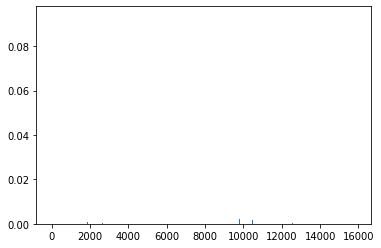

In [45]:
importance = model["classifier"].feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
 #print('Feature: %0d, Score: %.5f' % (i,v))
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

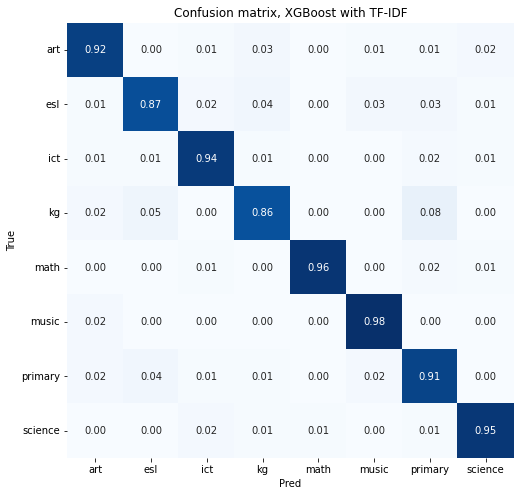

In [40]:
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)

cm = cm / [sum(cm[0]), sum(cm[1]), sum(cm[2]), sum(cm[3]), sum(cm[4]), sum(cm[5]), sum(cm[6]), sum(cm[7])]
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='.2f', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix, XGBoost with TF-IDF")
plt.yticks(rotation=0)

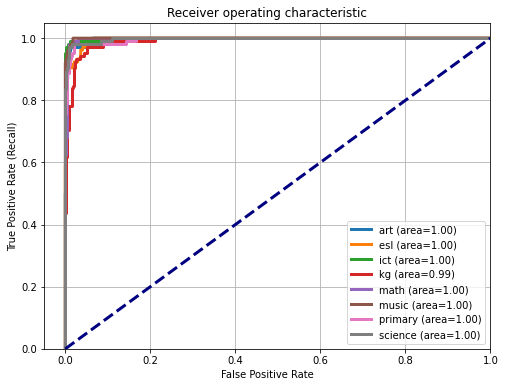

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax.plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax.set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax.legend(loc="lower right")
ax.grid(True)

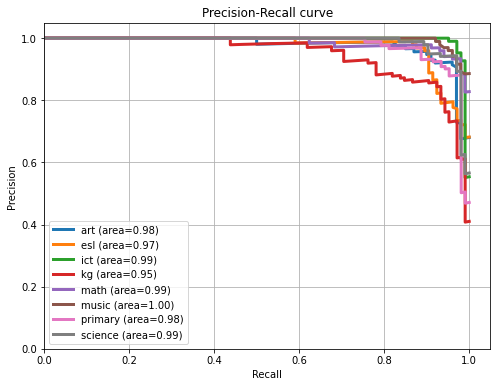

In [ ]:
## Plot precision-recall curve
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax.plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax.set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax.legend(loc="best")
ax.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [ ]:
## split dataset
dtf_train, dtf_test = train_test_split(resumeDataSet, test_size=0.2, stratify = resumeDataSet.position)
## get target
y_train = dtf_train["position"].values
y_test = dtf_test["position"].values

corpus = dtf_train["cleaned_resume"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

Accuracy: 0.86
Auc: 0.97
Detail:
                 precision    recall  f1-score   support

    art_teacher       0.94      0.86      0.90       151
    esl_teacher       0.81      0.86      0.83       158
    ict_teacher       0.88      0.91      0.89       154
     kg_teacher       0.76      0.79      0.78       158
   math_teacher       0.92      0.88      0.90       151
  music_teacher       0.94      0.93      0.94       151
primary_teacher       0.80      0.78      0.79       159
science_teacher       0.87      0.88      0.88       154

       accuracy                           0.86      1236
      macro avg       0.86      0.86      0.86      1236
   weighted avg       0.86      0.86      0.86      1236



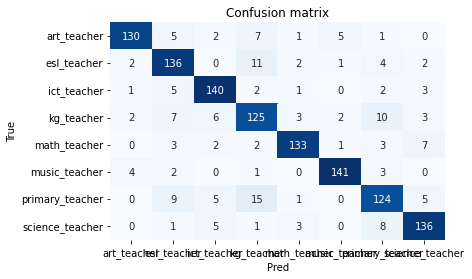

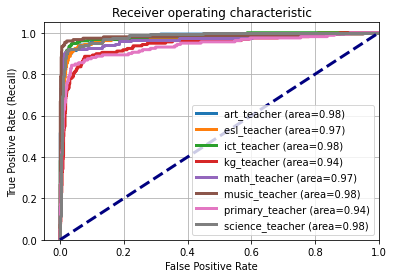

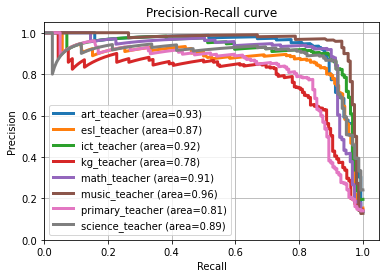

In [ ]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=1)
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax.plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax.set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax.legend(loc="lower right")
ax.grid(True)

## Plot precision-recall curve
fig, ax = plt.subplots(nrows=1, ncols=1)
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax.plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax.set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax.legend(loc="best")
ax.grid(True)
plt.show()

In [ ]:
import gensim

In [ ]:
corpus = dtf_train["cleaned_resume"]

## create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)

## detect bigrams and trigrams
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, 
                 delimiter=" ".encode(), min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], 
            delimiter=" ".encode(), min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [ ]:
## fit w2v
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, size=300,   
            window=8, min_count=1, sg=1, iter=30)

In [ ]:
## tokenize text
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index
## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_train = kprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=300, padding="post", truncating="post")

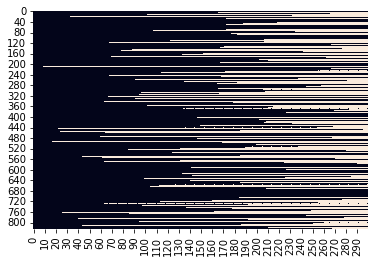

In [ ]:
import seaborn as sns
sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [ ]:
corpus = dtf_test["cleaned_resume"]

## create list of n-grams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus.append(lst_grams)
    
## detect common bigrams and trigrams using the fitted detectors
lst_corpus = list(bigrams_detector[lst_corpus])
lst_corpus = list(trigrams_detector[lst_corpus])
## text to sequence with the fitted tokenizer
lst_text2seq = tokenizer.texts_to_sequences(lst_corpus)

## padding sequence
X_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=300,
             padding="post", truncating="post")

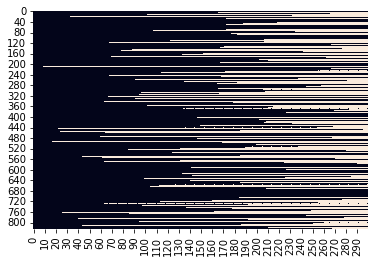

In [ ]:
sns.heatmap(X_test==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [ ]:
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, 300))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

In [ ]:
word = "data"
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape, 
      "|vector")

dic[word]: 78 |idx
embeddings[idx]: (300,) |vector


In [ ]:
## code attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="softmax")(x)
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x])
    return x

## input
x_in = layers.Input(shape=(300,))
## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=300, trainable=False)(x_in)
## apply attention
x = attention_layer(x, neurons=300)
## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=300, dropout=0.2, 
                         return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=300, dropout=0.2))(x)
## final dense layers
x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(8, activation='softmax')(x)
## compile
model = models.Model(x_in, y_out)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 300, 300)     6137400     ['input_3[0][0]']                
                                                                                                  
 permute_1 (Permute)            (None, 300, 300)     0           ['embedding_1[0][0]']            
                                                                                                  
 dense_3 (Dense)                (None, 300, 300)     90300       ['permute_1[0][0]']              
                                                                                            

In [ ]:
## encode y
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])
## train
training = model.fit(x=X_train, y=y_train, batch_size=128, 
                     epochs=10, shuffle=True, verbose=0, 
                     validation_split=0.15)


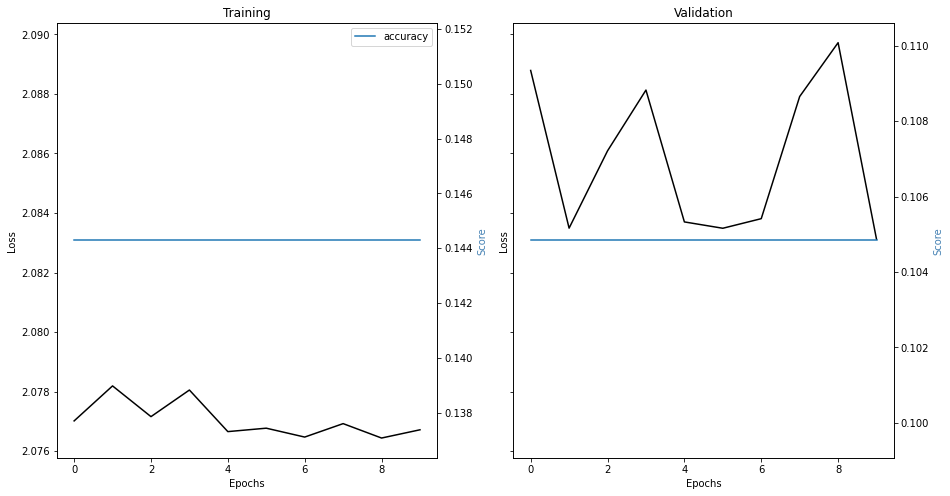

In [ ]:
## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,8))
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

In [ ]:
predicted_prob = model.predict(X_test)
predicted = [dic_y_mapping[np.argmax(pred)] for pred in 
             predicted_prob]

26/26 [==============================] - 4s 42ms/step


In [ ]:
print(metrics.classification_report(y_test, predicted))

AttributeError: ignored

In [ ]:

    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

IndentationError: ignored

In [ ]:
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
## for explainer
from lime import lime_text
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning


In [ ]:
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import transformers


In [ ]:
import gensim
from gensim.models import Word2Vec
from collections import defaultdict
from google.colab import drive
#drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

import random
import torch
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk import word_tokenize
from sklearn.pipeline import make_pipeline
nltk.download('punkt')

from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


cuda


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.model_selection import cross_validate

def return_scores(model, X_train, y_train, grams, **kwargs):

    scoring = ["accuracy",
            "precision_weighted",
            "recall_weighted", 
            "f1_weighted"]
    entries = []
    model_name = model.__class__.__name__
    scores = cross_validate(model, 
                            X_train, 
                            y_train, 
                            scoring = scoring, 
                            **kwargs)
    all_scores = []
    for key, value in scores.items():
        all_scores.append(value.mean())
    entries.append((model_name, all_scores[2], all_scores[3], all_scores[4], all_scores[5], grams))
    cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'grams' ])
    return cv_df

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
def cross_validate_models(embedding_function, X_train, y_train, grams):
    pipe_lr = make_pipeline(embedding_function, LogisticRegression(max_iter=1000, random_state=2))
    pipe_svc = make_pipeline(embedding_function, LinearSVC(random_state=2))
    pipe_knn = make_pipeline(embedding_function, KNeighborsClassifier())
    pipe_rf = make_pipeline(embedding_function, RandomForestClassifier(random_state=2))
    pipe_mnb = make_pipeline(embedding_function, MultinomialNB())
    pipe_xgb = make_pipeline(embedding_function, XGBClassifier())
    classifiers = {
        'Logistic Regression' : pipe_lr,
        "LinearSVC": pipe_svc,
        'KNN' : pipe_knn,
        'Random Forest' : pipe_rf,
        'MultinomialNB' : pipe_mnb,
        'XGBoost' : pipe_xgb
    }

    # cross validation score of the default model hyperparameter
    results_df = pd.DataFrame()
    for (name, pipe) in classifiers.items():
        results_df = results_df.append(return_scores(pipe, X_train, y_train, grams))
        results_df = results_df.replace('Pipeline',name)
    return results_df


In [ ]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = next(iter(word2vec.items()))[1].shape[0]

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ], dtype=object)

In [ ]:
word2vec_model = Word2Vec(X_train.apply(word_tokenize), seed=1)
word2vec_dict = dict(zip(word2vec_model.wv.key_to_index.keys(), 
         word2vec_model.wv.vectors))

word2vec_results = cross_validate_models(MeanEmbeddingVectorizer(word2vec_dict), 
                                         X_train.apply(word_tokenize), y_train, grams=1)

word2vec_results

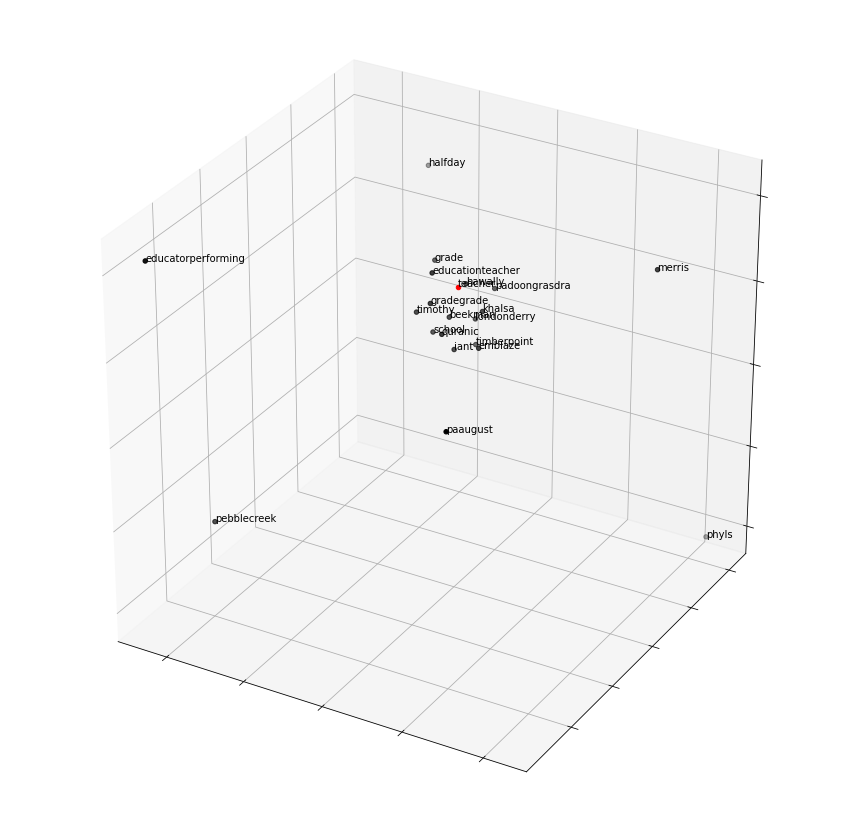

In [ ]:
word = "teacher"
fig = plt.figure(figsize=(15, 15))
## word embedding
tot_words = [word] + [tupla[0] for tupla in 
                 nlp.most_similar(word, topn=20)]
X = nlp[tot_words]
## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)
## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1
## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

In [ ]:
txt = "bank river"
## bert tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
## bert model
nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')
## return hidden layer with embeddings
input_ids = np.array(tokenizer.encode(txt))[None,:]  
embedding = nlp(input_ids)
embedding[0][0]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


<tf.Tensor: shape=(4, 768), dtype=float32, numpy=
array([[-0.34245968,  0.05200436, -0.2565389 , ..., -0.24441774,
         0.05279814,  0.44900668],
       [-0.38362497, -0.66715163, -0.35021335, ..., -0.10210493,
        -0.21629445, -0.29299957],
       [-0.3499616 , -0.08317098, -0.98768336, ...,  0.06963326,
        -0.49453   , -0.1608825 ],
       [ 0.7392344 ,  0.07391967, -0.45680934, ..., -0.0241577 ,
        -0.7649662 , -0.28110713]], dtype=float32)>

In [ ]:
## distil-bert tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)

In [ ]:
import re

In [ ]:
corpus = dtf_train["cv"]
maxlen = 512

## add special tokens
maxqnans = np.int((maxlen-20)/2)
corpus_tokenized = ["[CLS] "+
             " ".join(tokenizer.tokenize(re.sub(r'[^\w\s]+|\n', '', 
             str(txt).lower().strip()))[:maxqnans])+
             " [SEP] " for txt in corpus]

## generate masks
masks = [[1]*len(txt.split(" ")) + [0]*(maxlen - len(
           txt.split(" "))) for txt in corpus_tokenized]
    
## padding
txt2seq = [txt + " [PAD]"*(maxlen-len(txt.split(" "))) if len(txt.split(" ")) != maxlen else txt for txt in corpus_tokenized]
    


In [ ]:
## generate idx
idx = [tokenizer.encode(seq.split()) for seq in txt2seq]
    
## generate segments
segments = [] 
for seq in txt2seq:
    temp, i = [], 0
    for token in seq.split(" "):
        temp.append(i)
        if token == "[SEP]":
             i += 1
    segments.append(temp)
## feature matrix
X_train = [np.asarray(idx, dtype='int32'), 
           np.asarray(masks, dtype='int32'), 
           np.asarray(segments, dtype='int32')]

TypeError: ignored

In [ ]:
i = 0
print("txt: ", dtf_train["text"].iloc[0])
print("tokenized:", [tokenizer.convert_ids_to_tokens(idx) for idx in X_train[0][i].tolist()])
print("idx: ", X_train[0][i])
print("mask: ", X_train[1][i])
print("segment: ", X_train[2][i])